# WeatherPY

In [1]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
from scipy.stats import linregress

# Import API key
from api_keys import weather_key

# Incorporated citipy to determine city based on latitude and longitude
from citipy import citipy

# Output File (CSV)
output_data_file = "output_data/cities.csv"

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

# Generating City List

In [8]:
# List for holding lat_lngs and cities
lat_lngs = []
cities = []

# Create a set of random lat and lng combinations
lats = np.random.uniform(low=-90.000, high=90.000, size=1500)
lngs = np.random.uniform(low=-180.000, high=180.000, size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
number_cities = len(cities)
number_cities

620

# API Calls

In [9]:
# Save config information.
url = "http://api.openweathermap.org/data/2.5/weather?"
units = "metric"

# Build partial query URL
query_url = f"{url}appid={weather_key}&units={units}&q="

# Set up lists to hold response info
lat = []
lon = []
max_temp = []
humidity = []
cloudiness = []
wind_speed = []
country = []
date = []
city_list = []

In [10]:
# start counter for iterating the city list
count = 0

# starting text
print("Beginning Data Retrieval")     
print("-----------------------------")

# for loop to pull data from city list
for city in cities:
    
    # increase counter
    count = count + 1
    
    #pull data
    response = requests.get(query_url + city).json()
    
    # print log of each city as it's being processed
    print(f"Processing Record #{count} of {number_cities} cities | {city}")
    
    # use try to stash data in lists, and except in case the city cannot be found
    try:
        lat.append(response['coord']['lat'])
        lon.append(response['coord']['lon'])
        max_temp.append(response['main']['temp_max'])
        humidity.append(response['main']['humidity'])
        cloudiness.append(response['clouds']['all'])
        wind_speed.append(response['wind']['speed'])
        country.append(response['sys']['country'])
        date.append(response['dt'])
        city_list.append(city)
    except:
        print("City not found. Skipping...")

# ending text
print("-----------------------------")
print("Data Retrieval Complete")
print("-----------------------------")    

Beginning Data Retrieval
-----------------------------
Processing Record #1 of 620 cities | barentsburg
City not found. Skipping...
Processing Record #2 of 620 cities | hilo
Processing Record #3 of 620 cities | east london
Processing Record #4 of 620 cities | port elizabeth
Processing Record #5 of 620 cities | tasiilaq
Processing Record #6 of 620 cities | barrow
Processing Record #7 of 620 cities | bengkulu
Processing Record #8 of 620 cities | souillac
Processing Record #9 of 620 cities | dikson
Processing Record #10 of 620 cities | saint-francois
Processing Record #11 of 620 cities | manaure
Processing Record #12 of 620 cities | carman
Processing Record #13 of 620 cities | saint-philippe
Processing Record #14 of 620 cities | broome
Processing Record #15 of 620 cities | bluff
Processing Record #16 of 620 cities | altay
Processing Record #17 of 620 cities | mnogovershinnyy
Processing Record #18 of 620 cities | turtas
Processing Record #19 of 620 cities | olinda
Processing Record #20 of 

Processing Record #163 of 620 cities | cape town
Processing Record #164 of 620 cities | pevek
Processing Record #165 of 620 cities | saldanha
Processing Record #166 of 620 cities | mar del plata
Processing Record #167 of 620 cities | pimenta bueno
Processing Record #168 of 620 cities | vaitupu
City not found. Skipping...
Processing Record #169 of 620 cities | kununurra
Processing Record #170 of 620 cities | petropavlovsk-kamchatskiy
Processing Record #171 of 620 cities | saint anthony
Processing Record #172 of 620 cities | kavieng
Processing Record #173 of 620 cities | tahoua
Processing Record #174 of 620 cities | kaitangata
Processing Record #175 of 620 cities | kralendijk
Processing Record #176 of 620 cities | geraldton
Processing Record #177 of 620 cities | evensk
Processing Record #178 of 620 cities | kahului
Processing Record #179 of 620 cities | olafsvik
Processing Record #180 of 620 cities | narsaq
Processing Record #181 of 620 cities | saint-augustin
Processing Record #182 of 6

Processing Record #324 of 620 cities | uri
Processing Record #325 of 620 cities | ciudad bolivar
Processing Record #326 of 620 cities | south lake tahoe
Processing Record #327 of 620 cities | mariental
Processing Record #328 of 620 cities | kapoeta
Processing Record #329 of 620 cities | los llanos de aridane
Processing Record #330 of 620 cities | lae
Processing Record #331 of 620 cities | noumea
Processing Record #332 of 620 cities | castro
Processing Record #333 of 620 cities | mineros
Processing Record #334 of 620 cities | ibra
Processing Record #335 of 620 cities | tiruvottiyur
City not found. Skipping...
Processing Record #336 of 620 cities | norman wells
Processing Record #337 of 620 cities | koslan
Processing Record #338 of 620 cities | laguna
Processing Record #339 of 620 cities | porto novo
Processing Record #340 of 620 cities | beringovskiy
Processing Record #341 of 620 cities | polovinnoye
Processing Record #342 of 620 cities | nizhneyansk
City not found. Skipping...
Processi

Processing Record #487 of 620 cities | rio gallegos
Processing Record #488 of 620 cities | seymchan
Processing Record #489 of 620 cities | toliary
City not found. Skipping...
Processing Record #490 of 620 cities | port-gentil
Processing Record #491 of 620 cities | aklavik
Processing Record #492 of 620 cities | karaul
City not found. Skipping...
Processing Record #493 of 620 cities | nargana
Processing Record #494 of 620 cities | samus
Processing Record #495 of 620 cities | honiara
Processing Record #496 of 620 cities | yarmouth
Processing Record #497 of 620 cities | moerai
Processing Record #498 of 620 cities | avera
Processing Record #499 of 620 cities | firozpur
Processing Record #500 of 620 cities | nouadhibou
Processing Record #501 of 620 cities | westport
Processing Record #502 of 620 cities | fortuna
Processing Record #503 of 620 cities | calamar
Processing Record #504 of 620 cities | urumqi
Processing Record #505 of 620 cities | port augusta
Processing Record #506 of 620 cities 

# Creating the DataFrame

In [12]:
# create a dataframe from the collected data
weather_data = {
    "City": city_list,
    "Lat": lat,
    "Lng": lon,
    "Max Temp": max_temp,
    "Humidity": humidity,
    "Cloudiness": cloudiness,
    "Wind Speed": wind_speed,
    "Country": country,
    "Date": date
}
weather_df = pd.DataFrame(weather_data)

# export the dataframe to a csv
weather_df.to_csv("weather_data.csv", index=False)

# preview the dataframe
weather_df

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,hilo,19.73,-155.09,30.00,51,40,3.60,US,1598656730
1,east london,-33.02,27.91,15.73,67,46,1.40,ZA,1598656784
2,port elizabeth,-33.92,25.57,13.00,82,1,5.10,ZA,1598656782
3,tasiilaq,65.61,-37.64,6.00,93,100,0.50,GL,1598656793
4,barrow,71.29,-156.79,4.00,80,90,7.70,US,1598656746
...,...,...,...,...,...,...,...,...,...
563,hsinchu,24.80,120.97,30.00,84,20,1.50,TW,1598657243
564,conceicao do araguaia,-8.26,-49.26,29.73,29,67,1.18,BR,1598656972
565,tynda,55.17,124.72,8.25,76,100,0.43,RU,1598657244
566,kutum,14.20,24.67,23.48,70,64,2.26,SD,1598657244


In [17]:
# check the data for cities with humidity > 100%. Check maximum value first
# if the max value is 100 or less, data is clean to be used. Otherwise drop humidity outliers
weather_df["Humidity"].max()

100

# Plotting the Data
The next four scatter plots will represent the relationship of latitude to max temperature, humidity, cloudiness, and wind speed from a random sample of more than 500 cities using data collected from the OpenWeatherMap API.
## Latitude vs Temperature

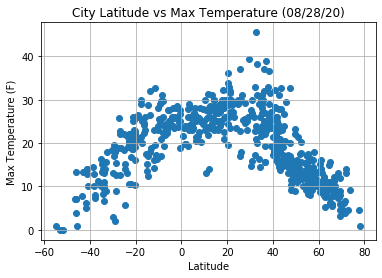

In [28]:
# Create a Scatter Plot for latitude vs temperature
x_values = weather_data['Lat']
y_values = weather_data['Max Temp']
plt.scatter(x_values,y_values)
plt.xlabel('Latitude')
plt.ylabel('Max Temperature (F)')
plt.title('City Latitude vs Max Temperature (08/28/20)')
plt.grid()
plt.savefig("Images/LatTemp.png")
plt.show()

Latitude and temperature appear to have a very strong correlation across both hemispheres.
## Latitude vs Humidity

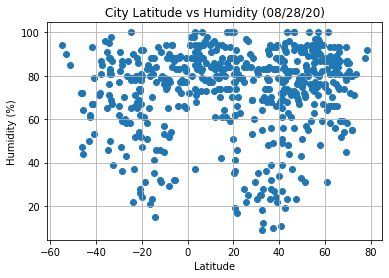

In [25]:
# Create a Scatter Plot for latitude vs humidity
x_values = weather_data['Lat']
y_values = weather_data['Humidity']
plt.scatter(x_values,y_values)
plt.xlabel('Latitude')
plt.ylabel('Humidity (%)')
plt.title('City Latitude vs Humidity (08/28/20)')
plt.grid()
plt.savefig("Images/LatHumid.png")
plt.show()

There isn't a clear correlation between latitude and humidity, but the data is somewhat dense at both the equator and 60 degrees north with clusters of high humidities.
## Latitude vs Cloudiness

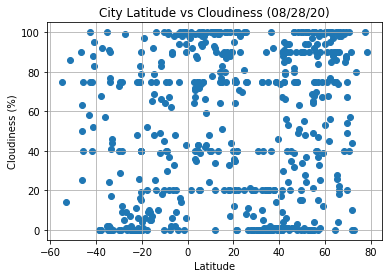

In [26]:
# Create a Scatter Plot for latitude vs cloudiness
x_values = weather_data['Lat']
y_values = weather_data['Cloudiness']
plt.scatter(x_values,y_values)
plt.xlabel('Latitude')
plt.ylabel('Cloudiness (%)')
plt.title('City Latitude vs Cloudiness (08/28/20)')
plt.grid()
plt.savefig("Images/LatCloud.png")
plt.show()

There is a somewhat even spread of cloudiness across latitudes but signifcant clustering at 90% and 100% cloudiness, as well as at 0%. 
## Latitude vs Wind Speed

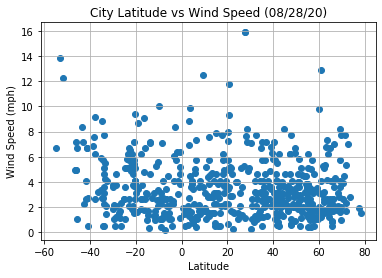

In [27]:
# Create a Scatter Plot for latitude vs wind speed
x_values = weather_data['Lat']
y_values = weather_data['Wind Speed']
plt.scatter(x_values,y_values)
plt.xlabel('Latitude')
plt.ylabel('Wind Speed (mph)')
plt.title('City Latitude vs Wind Speed (08/28/20)')
plt.grid()
plt.savefig("Images/LatWind.png")
plt.show()

Wind speed doesn't strongly correlate with latitude but the majority of cities sampled had low recorded wind speeds, most below 6 miles per hour.
# Linear Regression
The following four pairs of scatter plots will re-look at the previous four relationships, separating the data between hemispheres and also run linear regression on those relationships.

In [ ]:
# separate out northern hemisphere and southern hemisphere data
north_hemisphere = weather_df.loc[weather_df["Lat"] >= 0]
south_hemisphere = weather_df.loc[weather_df["Lat"] < 0]

## Northern Hemisphere - Max Temp vs. Latitude Linear Regression

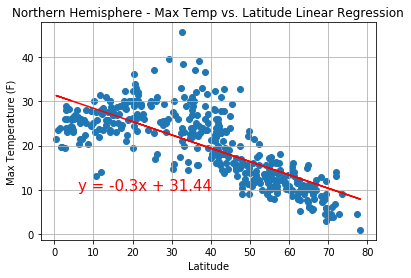

The r-value is: 0.5619621671457473


In [58]:
# Create a Scatter Plot for latitude vs temperature
x_values = north_hemisphere['Lat']
y_values = north_hemisphere['Max Temp']
plt.scatter(x_values,y_values)
plt.xlabel('Latitude')
plt.ylabel('Max Temperature (F)')
plt.title('Northern Hemisphere - Max Temp vs. Latitude Linear Regression')
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(6,10),fontsize=15,color="red")
plt.grid()
plt.savefig("Images/NorthLatTemp.png")
plt.show()
print(f"The r-value is: {rvalue**2}")

While some data begin to pull away from the line of regression, there is a strong negative correlation between max temperature and northern latitudes.
##  Southern Hemisphere - Max Temp vs. Latitude Linear Regression

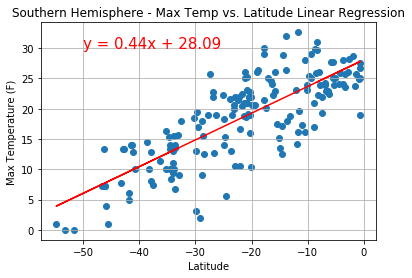

The r-value is: 0.6249245456450669


In [59]:
# Create a Scatter Plot for latitude vs temperature
x_values = south_hemisphere['Lat']
y_values = south_hemisphere['Max Temp']
plt.scatter(x_values,y_values)
plt.xlabel('Latitude')
plt.ylabel('Max Temperature (F)')
plt.title('Southern Hemisphere - Max Temp vs. Latitude Linear Regression')
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.plot(x_values,regress_values, "r-")
plt.annotate(line_eq,(-50,30),fontsize=15,color="red")
plt.grid()
plt.savefig("Images/SouthLatTemp.png")
plt.show()
print(f"The r-value is: {rvalue**2}")

The data from the southern hemisphere isn't nearly as strong as the relationship viewed in the northern, but it still indicates a positive correlation.
## Northern Hemisphere - Humidity (%) vs. Latitude Linear Regression

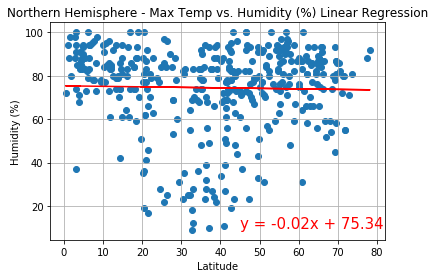

The r-value is: 0.0005737902460114369


In [61]:
# Create a Scatter Plot for latitude vs humidity
x_values = north_hemisphere['Lat']
y_values = north_hemisphere['Humidity']
plt.scatter(x_values,y_values)
plt.xlabel('Latitude')
plt.ylabel('Humidity (%)')
plt.title('Northern Hemisphere - Max Temp vs. Humidity (%) Linear Regression')
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(45,10),fontsize=15,color="red")
plt.grid()
plt.savefig("Images/NorthLatHumid.png")
plt.show()
print(f"The r-value is: {rvalue**2}")

There appears to be no correlation between humidity and max temp in the northern hemisphere, but humidity is mostly high in the northern hemisphere, majoryly between 75% and 95%.
## Southern Hemisphere - Humidity (%) vs. Latitude Linear Regression

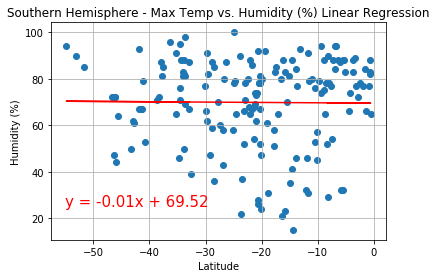

The r-value is: 0.0001029763295064277


In [66]:
# Create a Scatter Plot for latitude vs humidity
x_values = south_hemisphere['Lat']
y_values = south_hemisphere['Humidity']
plt.scatter(x_values,y_values)
plt.xlabel('Latitude')
plt.ylabel('Humidity (%)')
plt.title('Southern Hemisphere - Max Temp vs. Humidity (%) Linear Regression')
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(-55,25),fontsize=15,color="red")
plt.grid()
plt.savefig("Images/SouthLatHumid.png")
plt.show()
print(f"The r-value is: {rvalue**2}")

The southern hemisphere has a looser spread of humidity data, and still no correlation.
## Northern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression

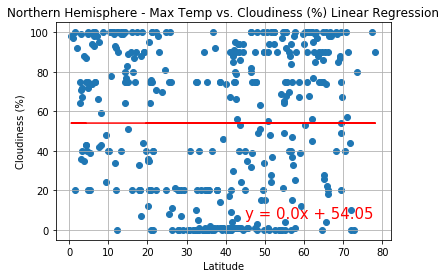

The r-value is: 1.068768424412681e-09


In [69]:
# Create a Scatter Plot for latitude vs humidity
x_values = north_hemisphere['Lat']
y_values = north_hemisphere['Cloudiness']
plt.scatter(x_values,y_values)
plt.xlabel('Latitude')
plt.ylabel('Cloudiness (%)')
plt.title('Northern Hemisphere - Max Temp vs. Cloudiness (%) Linear Regression')
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(45,6),fontsize=15,color="red")
plt.grid()
plt.savefig("Images/NorthLatCloud.png")
plt.show()
print(f"The r-value is: {rvalue**2}")

 ## Southern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression

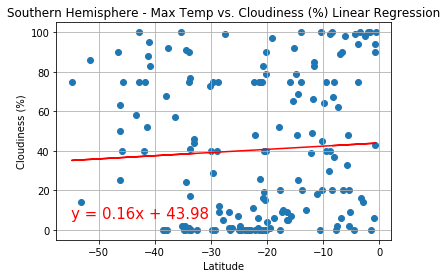

The r-value is: 0.0032885679766133354


In [74]:
# Create a Scatter Plot for latitude vs humidity
x_values = south_hemisphere['Lat']
y_values = south_hemisphere['Cloudiness']
plt.scatter(x_values,y_values)
plt.xlabel('Latitude')
plt.ylabel('Cloudiness (%)')
plt.title('Southern Hemisphere - Max Temp vs. Cloudiness (%) Linear Regression')
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(-55,6),fontsize=15,color="red")
plt.grid()
plt.savefig("Images/SouthLatCloud.png")
plt.show()
print(f"The r-value is: {rvalue**2}")

The slope of the line could suggest very weak positive correlation, but the data is so far spread out as a whole that it isn't very representative.
##  Northern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression

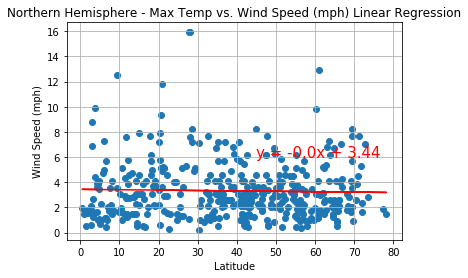

The r-value is: 0.0007814076754426177


In [71]:
# Create a Scatter Plot for latitude vs humidity
x_values = north_hemisphere['Lat']
y_values = north_hemisphere['Wind Speed']
plt.scatter(x_values,y_values)
plt.xlabel('Latitude')
plt.ylabel('Wind Speed (mph)')
plt.title('Northern Hemisphere - Max Temp vs. Wind Speed (mph) Linear Regression')
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(45,6),fontsize=15,color="red")
plt.grid()
plt.savefig("Images/NorthLatWind.png")
plt.show()
print(f"The r-value is: {rvalue**2}")

No correlation between latitude and wind speed. A similar observation as before with densely pack data at low wind speeds.
## Southern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression

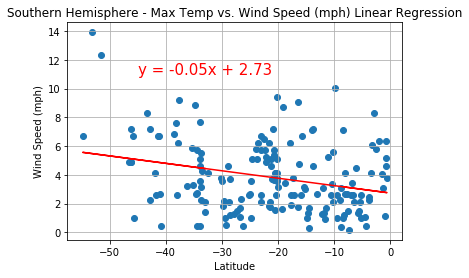

The r-value is: 0.07400023088895825


In [77]:
# Create a Scatter Plot for latitude vs humidity
x_values = south_hemisphere['Lat']
y_values = south_hemisphere['Wind Speed']
plt.scatter(x_values,y_values)
plt.xlabel('Latitude')
plt.ylabel('Wind Speed (mph)')
plt.title('Southern Hemisphere - Max Temp vs. Wind Speed (mph) Linear Regression')
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(-45,11),fontsize=15,color="red")
plt.grid()
plt.savefig("Images/SouthLatWind.png")
plt.show()
print(f"The r-value is: {rvalue**2}")

Weak negative correlation between latitude and wind speed in the southern hemisphere. More sample data could improve the line to further that potential relationship if it would more closely include some of the higher wind speeds at lower latitudes.